# Interfacing with Private Data

One of the main goals of OTTER is to make it easy to compare private data with the OTTER catalog, essentially interfacing with the OTTER dataset and private data together but _without_ making your private data public!

### Setup

In [1]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import matplotlib.pyplot as plt
import otter

Let's say you've recently gotten two new observations of the TDE 2018hyz with the Very Large Array. You've reduced the data and extracted it and you're curious how it looks compared to the previous radio observations of TDE 2018hyz. I've generated a fake dataset stored in the CSV format that OTTER expects (for both upload and interfacing with private data). Let's start by reading those in and displaying them. Note that the required columns for the metadata are:

```
"name"
"ra"
"dec"
"ra_unit"
"dec_unit"
"coord_bibcode"
```

and the required columns for the photometry are:
```
    "name"
    "date"
    "date_format"
    "filter"
    "filter_eff"
    "filter_eff_units",
    "flux"
    "flux_err"
    "flux_unit"
```

And then there are a bunch of optional columns, as listed on the upload page of the OTTER website. Note that these two tables will be merged based on the "name" column, so make sure those match appropriately.

In [2]:
meta = pd.read_csv("sample_meta.csv")
meta

,name,ra,dec,ra_unit,dec_unit,coord_bibcode,redshift,redshift_bibcode,discovery_date,discovery_date_format,discovery_date_bibcode,classification,classification_bibcode
0,2018hyz,10:06:50.87,01:41:34.08,hour,deg,2018TNSTR1708....1B,0.04573,2018TNSCR1764....1A,2018-11-06 15:21:36.000,iso,2018TNSTR1708....1B,TDE,2018TNSCR1764....1A


In [3]:
phot = pd.read_csv("sample_phot.csv")
phot

,name,flux,flux_unit,flux_err,date,date_format,filter,filter_eff,filter_eff_units
0,2018hyz,1,mJy,0.01,2025-05-20,iso,L,1.5,GHz
1,2018hyz,10,mJy,0.01,2025-05-23,iso,L,1.5,GHz


### Combining this with the OTTER dataset

To combine this with the otter dataset, we use the [Otter.from_csvs](https://astro-otter.readthedocs.io/en/latest/source.html#otter.Otter.from_csvs) static method

In [ ]:
# Connect to the otter database normally
db = otter.Otter()

# then use the Otter.from_csvs static method to read in the csvs simultaneously and tell otter where they are stored
db = otter.Otter.from_csvs(
    metafile = "sample_meta.csv",
    photfile = "sample_phot.csv",
    local_outpath = os.path.join(os.getcwd(), "private_otter_data"),
    db = db
)

print()
print(f"Your private data is stored in {db.DATADIR}")

Note the above warning, which shows that since we didn't provide a bibcode for the photometry, it assumes that it is private and uses a special keyword for the bibcodes. However, you will have to add a bibcode column to the photometry csv file before uploading to OTTER.

Now that the Otter class (e.g. `db` in this notebook) knows about your private dataset, we can query otter almost exactly the same as normal. The only caveat is that we have to add `query_private=True` whenever we pass a query to the API.

As an example, let's request all of the radio photometry.

In [5]:
allphot = db.get_phot(
    names="2018hyz", 
    obs_type="radio", 
    flux_unit="mJy", 
    query_private=True,
    return_type="pandas"
)
allphot[allphot.reference == 'private']

Unable to apply the source mapping because 'private'


,name,converted_flux,converted_flux_err,converted_date,converted_wave,converted_freq,converted_flux_unit,converted_date_unit,converted_wave_unit,converted_freq_unit,filter_name,obs_type,upperlimit,reference,human_readable_refs,telescope
838,2018hyz,1.0,0.01,60815.0,1.998616e+08,1.5,mJy,MJD,nm,GHz,L,radio,False,private,private,NaN
839,2018hyz,10.0,0.01,60818.0,1.998616e+08,1.5,mJy,MJD,nm,GHz,L,radio,False,private,private,NaN


And, you can see that your private data is now accessible via the normal otter API!

Let's plot up all of the L-band data for 18hyz

In [6]:
allphot[allphot.filter_name == "L"]

,name,converted_flux,converted_flux_err,converted_date,converted_wave,converted_freq,converted_flux_unit,converted_date_unit,converted_wave_unit,converted_freq_unit,filter_name,obs_type,upperlimit,reference,human_readable_refs,telescope
756,2018hyz,5.325,0.041,59686.00,2.306096e+08,1.3000,mJy,MJD,nm,GHz,L,radio,False,2022ApJ...938...28C,2022ApJ...938...28C,MeerKAT
793,2018hyz,4.850,0.220,59586.84,1.810888e+08,1.6555,mJy,MJD,nm,GHz,L,radio,False,2024ApJ...974..241A,2024ApJ...974..241A,RACS.high
812,2018hyz,0.960,0.210,59223.84,2.192267e+08,1.3675,mJy,MJD,nm,GHz,L,radio,False,2024ApJ...974..241A,2024ApJ...974..241A,RACS.mid
764,2018hyz,4.753,0.084,59530.00,2.188266e+08,1.3700,mJy,MJD,nm,GHz,L,radio,False,2022ApJ...938...28C,2022ApJ...938...28C,VLA
765,2018hyz,8.416,0.119,59603.00,2.188266e+08,1.3700,mJy,MJD,nm,GHz,L,radio,False,2022ApJ...938...28C,2022ApJ...938...28C,VLA
766,2018hyz,8.740,0.093,59655.00,2.188266e+08,1.3700,mJy,MJD,nm,GHz,L,radio,False,2022ApJ...938...28C,2022ApJ...938...28C,VLA
767,2018hyz,4.896,0.072,59530.00,1.850571e+08,1.6200,mJy,MJD,nm,GHz,L,radio,False,2022ApJ...938...28C,2022ApJ...938...28C,VLA
768,2018hyz,8.416,0.119,59603.00,1.850571e+08,1.6200,mJy,MJD,nm,GHz,L,radio,False,2022ApJ...938...28C,2022ApJ...938...28C,VLA
769,2018hyz,8.712,0.112,59655.00,1.850571e+08,1.6200,mJy,MJD,nm,GHz,L,radio,False,2022ApJ...938...28C,2022ApJ...938...28C,VLA
770,2018hyz,4.799,0.078,59530.00,1.594641e+08,1.8800,mJy,MJD,nm,GHz,L,radio,False,2022ApJ...938...28C,2022ApJ...938...28C,VLA


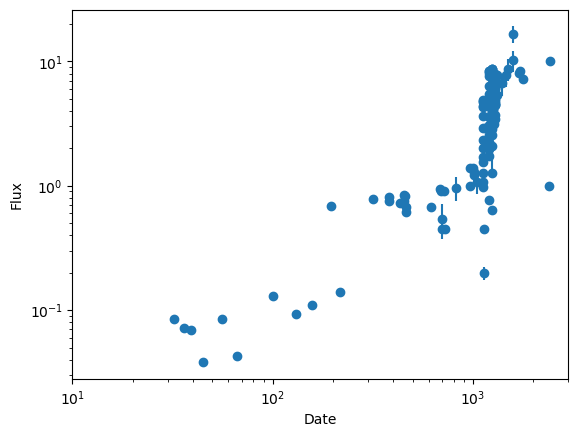

In [7]:
fig, ax = plt.subplots()

disc_date = db.get_meta(names="18hyz")[0].get_discovery_date().mjd

otter.plot_light_curve(
    date = allphot.converted_date - disc_date,
    flux = allphot.converted_flux,
    flux_err = allphot.converted_flux_err,
    marker = "o",
    linestyle = "none",
    fig=fig,
    ax=ax
)

ax.set_xlim(10,3000)
ax.set_xscale("log")
ax.set_yscale("log")

And now you can see our points on the far right! They don't really make any sense with the trend, but that's okay because it's fake data :)